In [1]:
import pandas as pd

In [2]:
credit_df = pd.read_csv('credit.csv')
dff_df = pd.read_csv('funds_rate.csv')
cpi_df = pd.read_csv('CPI.csv')
gdp_df = pd.read_csv('GDP.csv')
employ_df = pd.read_csv('unemployment.csv')

# Data Processing

### Credit datafram

In [3]:
credit_df.info()
credit_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   KEY:Timeseries Key  2205 non-null   object 
 1   Unit                2205 non-null   object 
 2   Unit multiplier     2205 non-null   object 
 3   TIME_PERIOD:Period  2205 non-null   object 
 4   OBS_VALUE:Value     2205 non-null   float64
dtypes: float64(1), object(4)
memory usage: 86.3+ KB


,KEY:Timeseries Key,Unit,Unit multiplier,TIME_PERIOD:Period,OBS_VALUE:Value
0,Q.US.C.A.M.USD.A,US dollar,Billions,1945-12-31,353.722
1,Q.US.C.A.M.USD.A,US dollar,Billions,1946-03-31,354.332
2,Q.US.C.A.M.USD.A,US dollar,Billions,1946-06-30,350.867
3,Q.US.C.A.M.USD.A,US dollar,Billions,1946-09-30,346.826
4,Q.US.C.A.M.USD.A,US dollar,Billions,1946-12-31,345.682
...,...,...,...,...,...
2200,Q.US.P.B.M.USD.A,US dollar,Billions,2023-06-30,13256.250
2201,Q.US.P.B.M.USD.A,US dollar,Billions,2023-09-30,13298.840
2202,Q.US.P.B.M.USD.A,US dollar,Billions,2023-12-31,13392.880
2203,Q.US.P.B.M.USD.A,US dollar,Billions,2024-03-31,13384.350


In [4]:
credit_df['KEY:Timeseries Key'].unique()

array(['Q.US.C.A.M.USD.A', 'Q.US.G.A.M.USD.A', 'Q.US.G.A.N.USD.A',
       'Q.US.H.A.M.USD.A', 'Q.US.N.A.M.USD.A', 'Q.US.P.A.M.USD.A',
       'Q.US.P.B.M.USD.A'], dtype=object)

In [5]:
bank_credit_df = credit_df[credit_df['KEY:Timeseries Key'] == 'Q.US.P.B.M.USD.A']
household_credit_df = credit_df[credit_df['KEY:Timeseries Key'] == 'Q.US.H.A.M.USD.A']
firm_credit_df = credit_df[credit_df['KEY:Timeseries Key'] == 'Q.US.N.A.M.USD.A']

In [6]:
bank_credit_df = bank_credit_df.reset_index(drop=True)
household_credit_df = household_credit_df.reset_index(drop=True)
firm_credit_df = firm_credit_df.reset_index(drop=True)

bank_credit_df.drop(['KEY:Timeseries Key','Unit','Unit multiplier'], axis=1, inplace=True)
household_credit_df.drop(['KEY:Timeseries Key','Unit','Unit multiplier'], axis=1, inplace=True)
firm_credit_df.drop(['KEY:Timeseries Key','Unit','Unit multiplier'], axis=1, inplace=True)

In [7]:
credit_df = pd.concat([bank_credit_df, household_credit_df, firm_credit_df], axis=1, ignore_index=True)
credit_df.drop([2,4], axis=1, inplace=True)

In [8]:
credit_df

,0,1,3,5
0,1945-12-31,30.810,29.442,55.940
1,1946-03-31,33.453,31.076,57.905
2,1946-06-30,36.126,32.727,59.891
3,1946-09-30,38.828,34.397,61.900
4,1946-12-31,41.530,36.067,63.908
...,...,...,...,...
310,2023-06-30,13256.250,19579.946,20926.007
311,2023-09-30,13298.840,19753.286,20965.363
312,2023-12-31,13392.880,19918.177,21031.968
313,2024-03-31,13384.350,19966.652,21237.236


In [9]:
credit_df.rename(columns={0:'date',1:'bank credit',3:'household credit',5:'firm credit'}, inplace = True)

In [10]:
credit_df['date'] = pd.to_datetime(credit_df['date'])
credit_df['date'] = credit_df['date'] + pd.Timedelta(days=1)
credit_df

,date,bank credit,household credit,firm credit
0,1946-01-01,30.810,29.442,55.940
1,1946-04-01,33.453,31.076,57.905
2,1946-07-01,36.126,32.727,59.891
3,1946-10-01,38.828,34.397,61.900
4,1947-01-01,41.530,36.067,63.908
...,...,...,...,...
310,2023-07-01,13256.250,19579.946,20926.007
311,2023-10-01,13298.840,19753.286,20965.363
312,2024-01-01,13392.880,19918.177,21031.968
313,2024-04-01,13384.350,19966.652,21237.236


### Data merge

In [11]:
def change_to_datetime(df_arr):
    for df in df_arr:
        df['observation_date'] = pd.to_datetime(df['observation_date'])
        df.rename(columns={'observation_date':'date'}, inplace = True)
        df = df.reset_index(drop=True)
                  
def find_min_date(df_arr):
    max_date = df_arr[0].iloc[0,0]
    for df in df_arr:
        new_date = df.iloc[0,0]
        if new_date > max_date:
            max_date = new_date
    return max_date

def find_max_date(df_arr):
    min_date = df_arr[0].iloc[-1,0]
    for df in df_arr:
        new_date = df.iloc[-1,0]
        if new_date < min_date:
            min_date = new_date
    return min_date

In [12]:
arr = [dff_df,cpi_df,gdp_df,employ_df]
change_to_datetime(arr)
start_date = find_min_date(arr)

In [13]:
arr = [credit_df,dff_df,cpi_df,gdp_df,employ_df]
end_date = find_max_date(arr)

In [14]:
print(start_date,end_date)

1954-07-01 00:00:00 2024-07-01 00:00:00


In [15]:
def crop_df(df_arr, start_date, end_date):
    return [df[(df['date'] >= start_date) & (df['date'] <= end_date)] for df in df_arr]

arr = crop_df(arr, start_date, end_date)

for df in arr:
    print(df.head(1))
    print(df.tail(1))

         date  bank credit  household credit  firm credit
34 1954-07-01       102.03           111.763      120.059
          date  bank credit  household credit  firm credit
314 2024-07-01     13473.28         20135.788    21406.544
        date   DFF
0 1954-07-01  1.03
          date   DFF
280 2024-07-01  5.26
         date  CPIAUCSL
30 1954-07-01     26.84
          date  CPIAUCSL
310 2024-07-01   314.114
         date     GDPC1
30 1954-07-01  2880.482
          date      GDPC1
310 2024-07-01  23400.294
         date  UNRATE
26 1954-07-01     6.0
          date  UNRATE
306 2024-07-01     4.2


In [16]:
final = arr[0]
for df in arr[1:]:
    final = pd.merge(final, df, on='date', how='inner')

final.head()

,date,bank credit,household credit,firm credit,DFF,CPIAUCSL,GDPC1,UNRATE
0,1954-07-01,102.03,111.763,120.059,1.03,26.840,2880.482,6.0
1,1954-10-01,104.48,115.171,122.051,0.99,26.757,2936.852,5.3
2,1955-01-01,107.48,120.453,123.758,1.35,26.793,3020.746,4.7
3,1955-04-01,110.51,123.626,125.322,1.50,26.757,3069.910,4.4
4,1955-07-01,116.54,130.685,128.692,1.94,26.777,3111.379,4.1


# Analysing the data

In [17]:
final.describe()

,date,bank credit,household credit,firm credit,DFF,CPIAUCSL,GDPC1,UNRATE
count,281,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,1989-07-01 11:06:11.530249088,4016.230285,5929.052107,5466.829021,4.608968,131.137043,10913.956883,5.826335
min,1954-07-01 00:00:00,102.030000,111.763000,120.059000,0.060000,26.757000,2880.482000,3.400000
25%,1972-01-01 00:00:00,560.700000,511.303000,566.409000,1.930000,41.333000,5632.649000,4.600000
50%,1989-07-01 00:00:00,2942.440000,3227.057000,3588.595000,4.330000,124.600000,9919.228000,5.600000
75%,2007-01-01 00:00:00,7714.090000,13394.962000,9285.546000,6.270000,204.317000,16396.151000,6.900000
max,2024-07-01 00:00:00,13473.280000,20135.788000,21406.544000,17.790000,314.114000,23400.294000,13.000000
std,NaN,3848.912677,6193.037505,5880.805018,3.556985,84.939153,5950.415949,1.665067


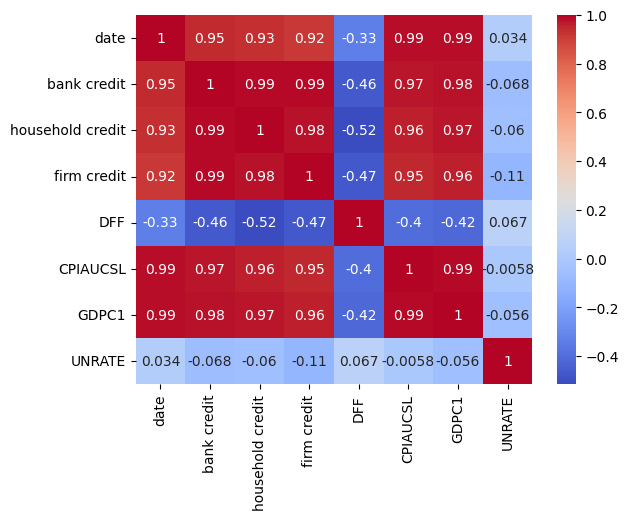

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = final.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

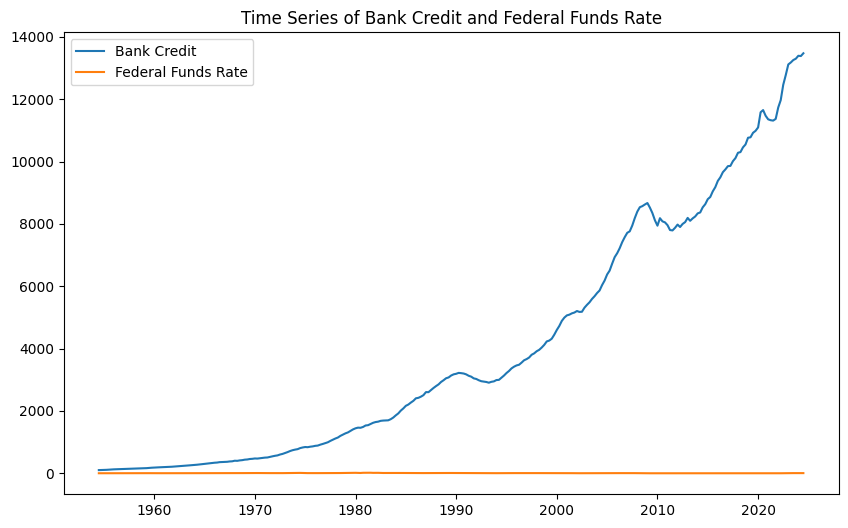

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(final['date'], final['bank credit'], label='Bank Credit')
plt.plot(final['date'], final['DFF'], label='Federal Funds Rate')
plt.legend()
plt.title('Time Series of Bank Credit and Federal Funds Rate')
plt.show()


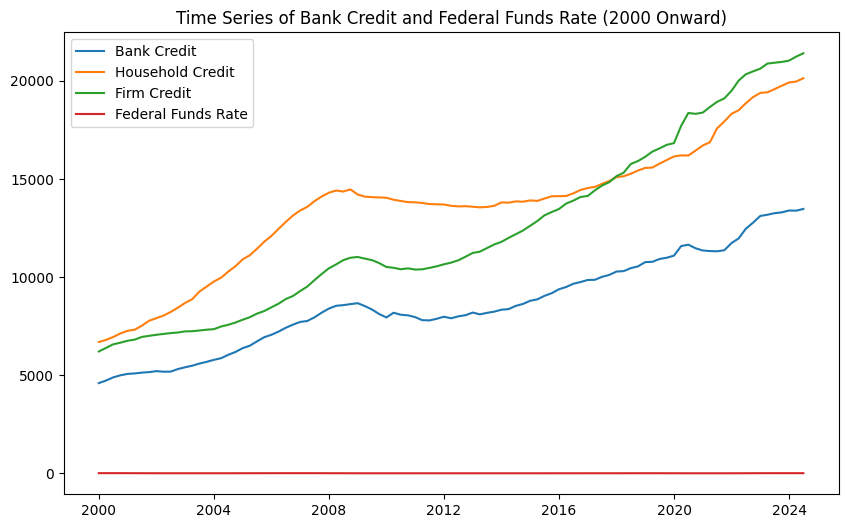

In [20]:
filtered_data = final[final['date'] >= '2000-01-01']

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['date'], filtered_data['bank credit'], label='Bank Credit')
plt.plot(filtered_data['date'], filtered_data['household credit'], label='Household Credit')
plt.plot(filtered_data['date'], filtered_data['firm credit'], label='Firm Credit')
plt.plot(filtered_data['date'], filtered_data['DFF'], label='Federal Funds Rate')
plt.legend()
plt.title('Time Series of Bank Credit and Federal Funds Rate (2000 Onward)')
plt.show()


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final[['bank credit', 'household credit', 'firm credit']] = scaler.fit_transform(
    final[['bank credit', 'household credit', 'firm credit']]
)


## Bank Credit

In [22]:
import statsmodels.api as sm

X = final[['DFF', 'CPIAUCSL', 'GDPC1', 'UNRATE']]
y = final['bank credit']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            bank credit   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2024.
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.08e-203
Time:                        17:52:09   Log-Likelihood:                 80.729
No. Observations:                 281   AIC:                            -151.5
Df Residuals:                     276   BIC:                            -133.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6459      0.072    -22.807      0.0

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)


   Variable        VIF
0     const  43.607773
1       DFF   1.223526
2  CPIAUCSL  94.128378
3     GDPC1  95.479183
4    UNRATE   1.238830


In [24]:
X_reduced = X.drop(columns=["CPIAUCSL"])

model_reduced = sm.OLS(y, sm.add_constant(X_reduced)).fit()
print(model_reduced.summary())


                            OLS Regression Results                            
Dep. Variable:            bank credit   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2708.
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          7.46e-205
Time:                        17:52:09   Log-Likelihood:                 80.695
No. Observations:                 281   AIC:                            -153.4
Df Residuals:                     277   BIC:                            -138.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6327      0.051    -32.030      0.0

In [25]:
X_reduced = X.drop(columns=["UNRATE"])
model_reduced = sm.OLS(y, sm.add_constant(X_reduced)).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            bank credit   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2704.
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          9.13e-205
Time:                        17:52:09   Log-Likelihood:                 80.491
No. Observations:                 281   AIC:                            -153.0
Df Residuals:                     277   BIC:                            -138.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6846      0.045    -37.748      0.0

## Household Credit

In [26]:
y_household = final['household credit']

household_model = sm.OLS(y_household, sm.add_constant(X)).fit()
print(household_model.summary())


                            OLS Regression Results                            
Dep. Variable:       household credit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1867.
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.91e-198
Time:                        17:52:09   Log-Likelihood:                 69.775
No. Observations:                 281   AIC:                            -129.6
Df Residuals:                     276   BIC:                            -111.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6139      0.075    -21.510      0.0

In [27]:
X['DFF_CPI_Interaction'] = X['DFF'] * X['CPIAUCSL']

interaction_model = sm.OLS(final['household credit'], sm.add_constant(X)).fit()
print(interaction_model.summary())


                            OLS Regression Results                            
Dep. Variable:       household credit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1492.
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          6.68e-197
Time:                        17:52:09   Log-Likelihood:                 70.058
No. Observations:                 281   AIC:                            -128.1
Df Residuals:                     275   BIC:                            -106.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.5952    

## Firm Credit

In [28]:
y_firm = final['firm credit']

firm_model = sm.OLS(y_firm, sm.add_constant(X)).fit()
print(firm_model.summary())


                            OLS Regression Results                            
Dep. Variable:            firm credit   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     796.5
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.77e-161
Time:                        17:52:09   Log-Likelihood:                -13.791
No. Observations:                 281   AIC:                             39.58
Df Residuals:                     275   BIC:                             61.41
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3671    

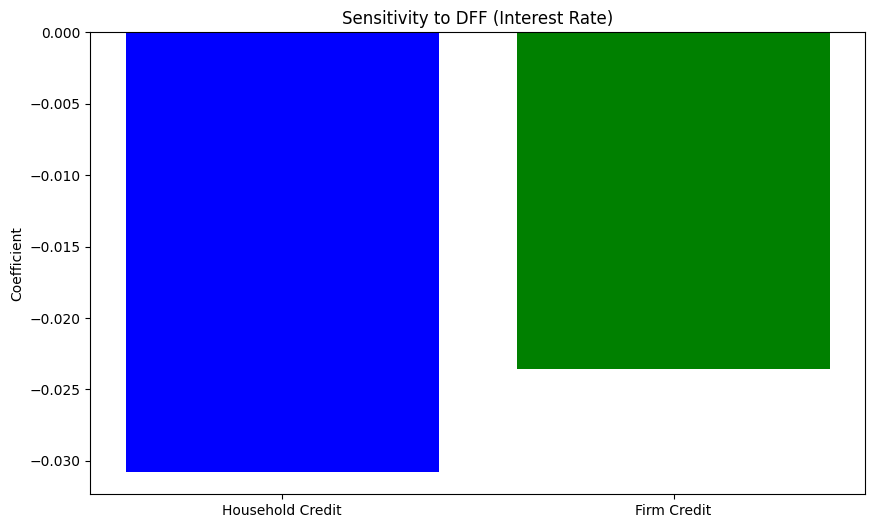

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(['Household Credit', 'Firm Credit'], [-0.0308, -0.0236], color=['blue', 'green'])
plt.title('Sensitivity to DFF (Interest Rate)')
plt.ylabel('Coefficient')
plt.show()


In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X[['DFF', 'GDPC1']])
model_poly = LinearRegression().fit(X_poly, y_firm)
print("Polynomial R2:", model_poly.score(X_poly, y_firm))


Polynomial R2: 0.9926375137089019


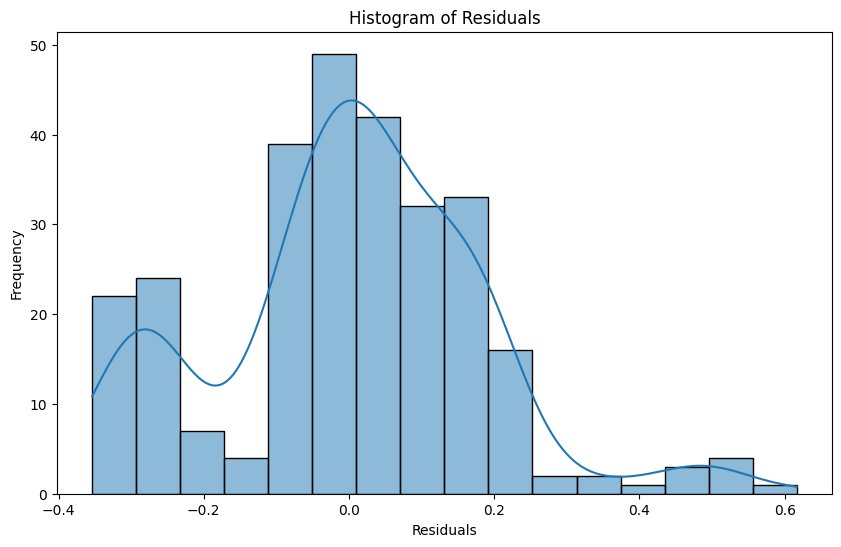

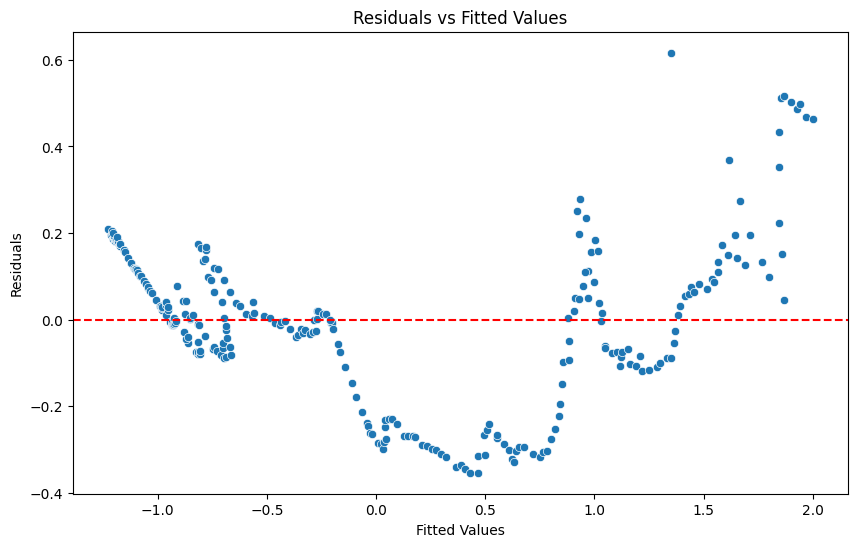

In [31]:
residuals = model.resid

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.predict(), y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))


Random Forest R2 Score: 0.9955723242011064
Random Forest RMSE: 0.06503456904123703


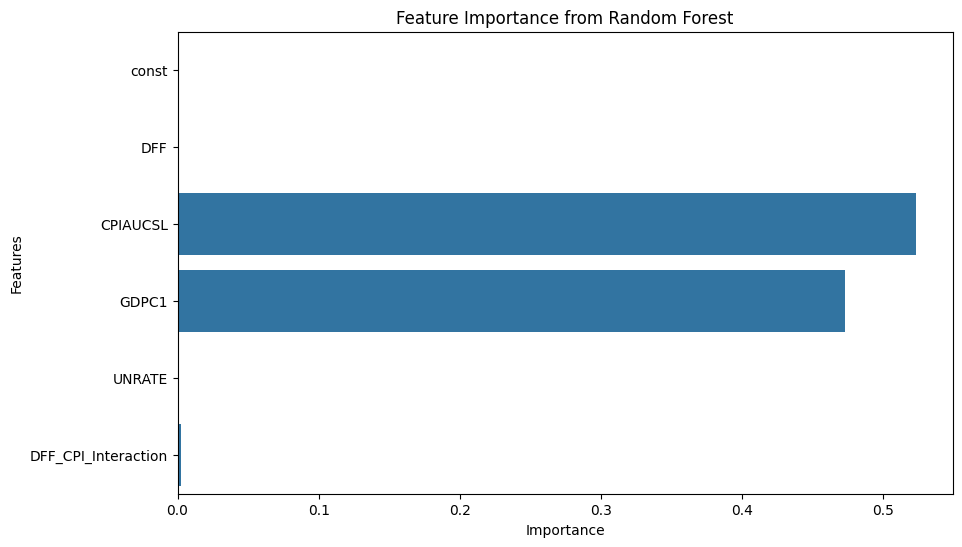

In [35]:
importance = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=X.columns)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


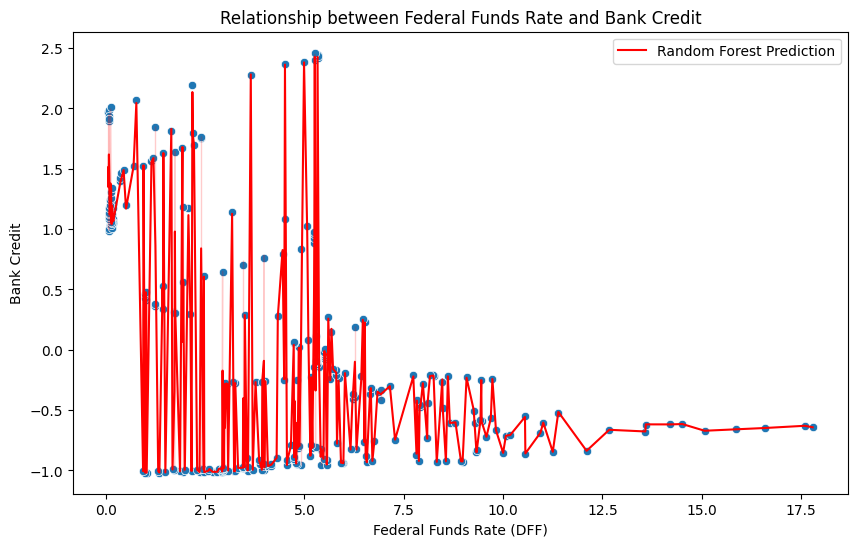

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final['DFF'], y=final['bank credit'])
sns.lineplot(x=final['DFF'], y=rf_model.predict(X), color='red', label='Random Forest Prediction')
plt.title("Relationship between Federal Funds Rate and Bank Credit")
plt.xlabel("Federal Funds Rate (DFF)")
plt.ylabel("Bank Credit")
plt.legend()
plt.show()
